© 版权所有 Wenting Tu

# <b><span style='color:#F1C40F'>|</span> 实践题：信用卡欺诈预测 (70%)</b>
- 数据集来源：https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
- 对比用与不用四则运算扩展特征得到的效果
- 对比随机森林与GBDT的效果（需要同时对比模型效果与时间开销）
- 代码需从导入原始数据开始编写（见下方）


In [1]:
import pandas as pd
df = pd.read_csv(r"D:\OneDrive\桌面\机器学习\作业\机器学习作业3\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
df.isnull().sum().max()

0

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


数据集存在不平衡问题

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score,precision_recall_curve, auc
import time

In [7]:
#解决数据集不平衡问题
df["Time"] = StandardScaler().fit_transform(df["Time"].values.reshape(-1, 1))
df["Amount"] = StandardScaler().fit_transform(df["Amount"].values.reshape(-1, 1))

#打乱原始数据
df = df.sample(frac=1)

#分离欺诈和非欺诈样本
#通过切片[:492]对非欺诈样本进行下采样，使两类样本数量相等
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

#合并数据集
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

#再次打乱数据集
df_new = normal_distributed_df.sample(frac=1, random_state=42)

df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
124167,-0.370932,1.006092,-0.519580,0.271483,0.092154,-0.700889,-0.623678,-0.028736,-0.135476,0.382273,...,-0.191068,-0.939348,-0.021716,-0.115805,0.004690,0.761375,-0.099410,0.034770,0.286464,0
96789,-0.608108,-3.593476,0.781442,-1.822448,0.605761,-1.194656,-0.517195,-1.722523,0.128890,0.014963,...,0.351792,0.391249,-0.252875,-0.498042,0.010172,0.909929,-1.478767,0.722673,0.052576,1
262641,1.384793,2.211421,-1.026599,-0.736977,-1.182662,-0.740438,0.080420,-1.226002,0.081123,-0.048549,...,0.372446,1.119054,-0.001928,-1.061228,-0.086001,-0.017503,0.012567,-0.067289,-0.343234,0
230476,1.085118,-0.099724,2.795414,-6.423856,3.247513,-1.632290,-2.766665,-2.312223,0.961014,-1.896001,...,0.647714,0.126576,0.203953,0.008495,-0.174501,0.575295,0.152876,-0.098173,0.025869,1
79874,-0.770654,-0.443794,1.271395,1.206178,0.790371,0.418935,-0.848376,0.917691,-0.235511,-0.285692,...,0.119279,0.513479,-0.264243,0.443311,0.029516,-0.335141,-0.188815,-0.123391,-0.332879,1


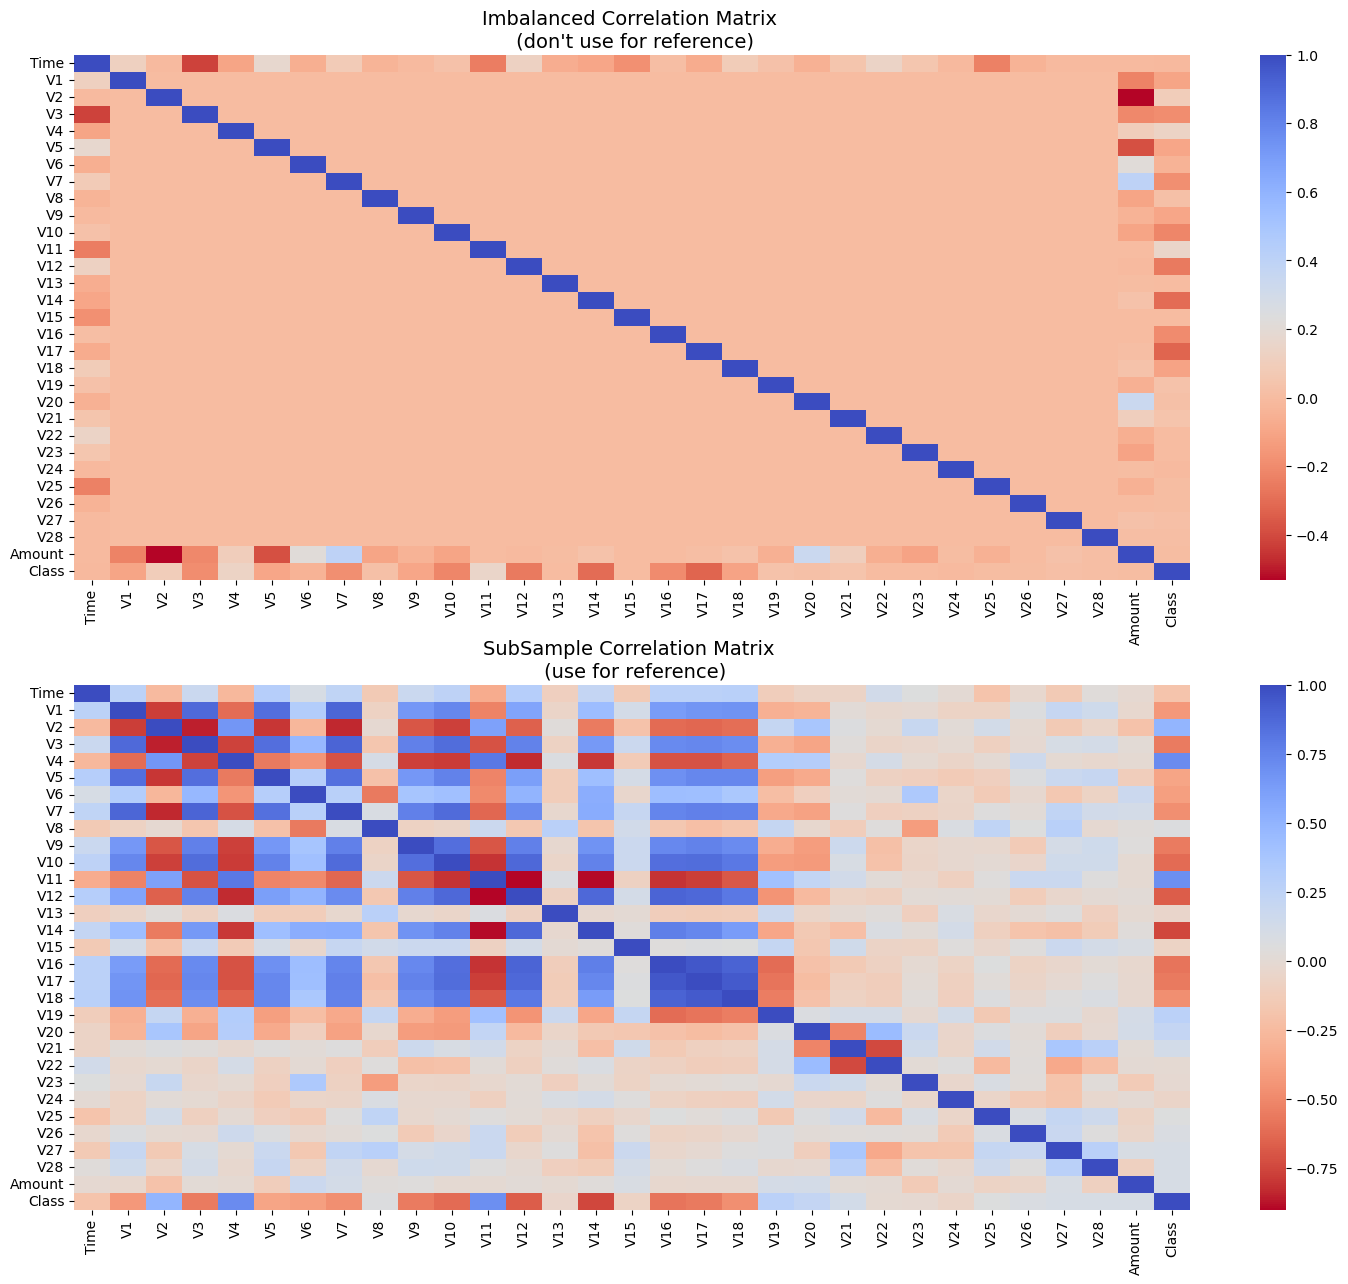

In [8]:
#利用相关矩阵寻找负相关与正相关特征

import matplotlib.pyplot as plt
import seaborn as sns

#创建画布
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,15))

#原始数据相关性分析
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

#平衡子样本相关性分析
sub_sample_corr = df_new.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)

plt.show()

V2,V4,V11,V19与class负相关，V1,V3,V5,V6,V7,V9,V10,V12,V14,V16,V17,V18与class正相关，同时部分特征之间存在高度相关性

In [9]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [10]:
# 扩展特征生成

# 正相关特征
pos_sum = ( df["V2"] + df["V4"] + df["V11"] + df["V19"] ) / 4

# 负相关特征和
neg_sum = ( df["V1"] + df["V3"] + df["V5"] + df["V6"] + df["V7"] + df["V9"] + df["V10"] + df["V12"] + df["V14"] + df["V16"] + df["V17"] + df["V18"] ) / 12 + 1e-6 

# 生成新特征
df["new_features_1"] = pos_sum / neg_sum
df["new_features_2"] = pos_sum - neg_sum

# 标准化新特征
df[["new_features_1", "new_features_2"]] = StandardScaler().fit_transform(df[["new_features_1", "new_features_2"]])

X = df.drop("Class", axis=1)  

base_features = X.columns.tolist() 
new_features = ["new_features_1", "new_features_2"]
all_features = base_features  

# 划分数据集
# 直接使用 X 的不同子集
X_base = X.drop(new_features, axis=1) 
X_extended = X 

# 划分训练集和测试集
X_train_base, X_test_base, y_train, y_test = train_test_split(
    X_base, y, test_size=0.3, random_state=42, stratify=y
)

X_train_ext, X_test_ext, _, _ = train_test_split(
    X_extended, y, test_size=0.3, random_state=42, stratify=y
)

In [11]:
#评估指标
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    auprc = auc(recall, precision) 
   
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba),
        "AUPRC": auprc,
    }

In [12]:
#训练模型
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "GBDT": GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
}
results = {}

for model_name in models:
    # 训练基础特征模型
    start_time = time.time()
    models[model_name].fit(X_train_base, y_train)
    base_time = time.time() - start_time
    base_metrics = evaluate_model(models[model_name], X_test_base, y_test)
    
    # 训练扩展特征模型
    start_time = time.time()
    models[model_name].fit(X_train_ext, y_train)
    ext_time = time.time() - start_time
    ext_metrics = evaluate_model(models[model_name], X_test_ext, y_test)
    
    # 保存结果
    results[model_name] = {
        "Base Features": {"Time": base_time, **base_metrics},
        "Extended Features": {"Time": ext_time, **ext_metrics}
    }

In [16]:
# 打印结果
for model_name in results:
    print(f"\n{model_name}")
    print("原始特征效果:")
    print(pd.DataFrame(results[model_name]["Base Features"], index=[" "]).T)
    print("\n扩展后特征效果:")
    print(pd.DataFrame(results[model_name]["Extended Features"], index=[" "]).T)


RandomForest
原始特征效果:
                    
Time       46.314605
Accuracy    0.999309
Precision   0.873950
Recall      0.702703
F1          0.779026
ROC AUC     0.951186
AUPRC       0.787970

扩展后特征效果:
                    
Time       46.593667
Accuracy    0.999345
Precision   0.877049
Recall      0.722973
F1          0.792593
ROC AUC     0.954633
AUPRC       0.792061

GBDT
原始特征效果:
                     
Time       253.871043
Accuracy     0.999075
Precision    0.841584
Recall       0.574324
F1           0.682731
ROC AUC      0.763376
AUPRC        0.659884

扩展后特征效果:
                     
Time       290.040412
Accuracy     0.998666
Precision    0.904762
Recall       0.256757
F1           0.400000
ROC AUC      0.415341
AUPRC        0.310687


综上，用四则运算扩展特征后的随机森林算法效果最佳